### Descrição do Projeto
#### Contexto
Você é analista em uma grande loja online. Junto com o departamento de marketing, você compilou uma lista de hipóteses que podem ajudar a aumentar a receita.

Você precisa priorizar essas hipóteses, lançar um teste A/B e analisar os resultados.

#### Descrição dos dados
- Dados usados na primeira parte do projeto

/datasets/hypotheses_us.csv Baixe o conjunto de dados

Hypotheses — breves descrições das hipóteses
Reach — alcance do usuário, em uma escala de um a dez
Impact — impacto nos usuários, em uma escala de um a dez
Confidence — confiança na hipótese, em uma escala de um a dez
Effort — os recursos necessários para testar uma hipótese, em uma escala de um a dez. Quanto maior o valor de Effort, mais recursos são necessários para o teste.

- Dados usados na segunda parte do projeto

 /datasets/orders_us.csv Baixe o conjunto de dados

transactionId — identificador do pedido
visitorId — identificador do usuário que fez o pedido
date — do pedido
revenue — do pedido
group — o grupo de teste A/B ao qual o usuário pertence
/datasets/visits_us.csv Baixe o conjunto de dados

date — data
group — grupo de teste A/B
visits — o número de visitas na data especificada para o grupo de teste A/B especificado

*Certifique-se de pré-processar os dados. Pode haver erros nos conjuntos de dados originais; por exemplo, alguns dos visitantes podem ter entrado no grupo A e no grupo B.*

#### Parte 1. Priorizando Hipóteses
O arquivo hypotheses_us.csv contém nove hipóteses para aumentar a receita de uma loja online com Reach, Impact, Confidence e Effort especificados para cada um.

A tarefa é:

- Aplicar o framework ICE para priorizar hipóteses. Classifique-os em ordem decrescente de prioridade.
- Aplicar o framework RICE para priorizar hipóteses. Classifique-os em ordem decrescente de prioridade.
Mostre como a priorização de hipóteses muda quando você usa RICE em vez de ICE. Dê uma explicação para as alterações.

Parte 2. Análise de teste A/B
- Você realizou um teste A/B e obteve os resultados descritos nos arquivos orders_us.csv e visitors_us.csv.

Tarefa

Analise o teste A/B:

- Faça um gráfico da receita acumulada por grupo. Tire conclusões e crie conjecturas.
- Faça um gráfico do tamanho médio acumulado do pedido por grupo. Tire conclusões e crie conjecturas.
- Faça um gráfico da diferença relativa no tamanho médio acumulado do pedido para o grupo B em comparação com o grupo A. Faça conclusões e crie conjecturas.
- Calcule a taxa de conversão de cada grupo como a proporção de pedidos para o número de visitas para cada dia. Trace as taxas de conversão diárias dos dois grupos e descreva a diferença. Tire conclusões e crie conjecturas.
- Faça um gráfico da diferença relativa na conversão cumulativa para o grupo B em comparação com o grupo A. Tire conclusões e crie conjecturas.
- Calcule os percentis 95 e 99 para o número de pedidos por usuário. Defina o ponto em que um ponto de dados se torna uma anomalia.
- Faça um gráfico de dispersão dos preços dos pedidos. Tire conclusões e crie conjecturas.
- Calcule os percentis 95 e 99 dos preços dos pedidos. Defina o ponto em que um ponto de dados se torna uma anomalia.
- Encontre a significância estatística da diferença na conversão entre os grupos usando os dados brutos. Tire conclusões e crie conjecturas.
- Encontre a significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados brutos. Tire conclusões e crie conjecturas.
- Encontre a significância estatística da diferença na conversão entre os grupos usando os dados filtrados. Tire conclusões e crie conjecturas.
- Encontre a significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados filtrados. Tire conclusões e crie conjecturas.
- Tome uma decisão com base nos resultados do teste. As decisões possíveis são: 1. Pare o teste, considere um dos grupos o líder. 2. Pare o teste, conclua que não há diferença entre os grupos. 3. Continue o teste.

In [157]:
# Importando as Bibliotecas:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mth
import datetime as dt
import scipy.stats as stats

In [135]:
# Baixando conjunto de dados:

hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
orders = pd.read_csv('/datasets/orders_us.csv', sep=',', parse_dates = ['date'])
visits = pd.read_csv('/datasets/visits_us.csv', sep=',', parse_dates = ['date'])

In [136]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [137]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [138]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [139]:
# vendo amostra dos dados

print(hypotheses.head())

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  


In [140]:
print(orders.head())

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     30.4     B
1     2804400009  3642806036 2019-08-15     15.2     B
2     2961555356  4069496402 2019-08-15     10.2     A
3     3797467345  1196621759 2019-08-15    155.1     B
4     2282983706  2322279887 2019-08-15     40.5     B


In [141]:
print(visits.head())

        date group  visits
0 2019-08-01     A     719
1 2019-08-02     A     619
2 2019-08-03     A     507
3 2019-08-04     A     717
4 2019-08-05     A     756


In [142]:
# verificando se há algum usuário que entrou nos dois grupos A e B:
group_verification = (orders.drop(['date'], axis=1)).groupby('group', as_index=False).agg({'visitorId': 'count', 'transactionId': 'count'}) #eliminando date para evitar erros pandas.
print(group_verification)

# Verificando se existem usuarios repetidos nos grupos:
group_a = orders[orders['group'] == 'A']['visitorId']
group_b = orders[orders['group'] == 'B']['visitorId']
users_a_b = group_a[group_a.isin(group_b)].unique()
print(users_a_b)

  group  visitorId  transactionId
0     A        557            557
1     B        640            640
[4069496402  199603092 3803269165 2378935119  237748145 4256040402
 2038680547 1738359350 2458001652 3891541246 2716752286 3656415546
 2686716486 2954449915 2927087541 3234906277  457167155 2579882178
 3957174400 1648269707 2780786433  818047933 2044997962 1959144690
 3202540741 1333886533  351125977 3951559397  393266494 3984495233
 4120364173 4266935830 1230306981 1294878855 1614305549    8300375
  477780734 1668030113 3717692402 3766097110 3941795274  471551937
 1316129916 1801183820 1602967004 2587333274 2600415354  232979603
 3972127743 1404934699  276558944 3062433592 2654030115 3963646447
 4186807279 2712142231 2949041841  963407295]


#### Resposta do Aluno: 
#### Para evitar eventuais erros, vai ser necessário excluir os usuários em ambos os grupos, visto que não posso determinar em qual grupo cada usuário deve permanecer

In [143]:
# retirando os usuarios duplicados no df orders

orders = orders[~orders['visitorId'].isin(users_a_b)]

# Verificando novamente a contagem:
group_verification = (orders.drop(['date'], axis=1)).groupby('group', as_index=False).agg({'visitorId': 'count', 'transactionId': 'count'}) #eliminando date para evitar erros pandas.
print(group_verification)

  group  visitorId  transactionId
0     A        468            468
1     B        548            548


#### Resposta do aluno:  Ok, o dataframe já esta pronto para a próxima etapa do teste

In [144]:
# Parte 1º
# Hipoteses para aumentar a receita:
# Aplicar o framework ICE para priorizar hipóteses. Classifique-os em ordem decrescente de prioridade. Impacto  x Confiança x facilidade

hypotheses['ICE']= (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
print(hypotheses[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=True))

                                          Hypothesis        ICE
4  Change the background color on the main page. ...   1.000000
3  Change the category structure. This will incre...   1.125000
5  Add a customer review page. This will increase...   1.333333
1  Launch your own delivery service. This will sh...   2.000000
2  Add product recommendation blocks to the store...   7.000000
6  Show banners with current offers and sales on ...   8.000000
7  Add a subscription form to all the main pages....  11.200000
0  Add two new channels for attracting traffic. T...  13.333333
8  Launch a promotion that gives users discounts ...  16.200000


In [145]:
# Aplicar o framework RICE para priorizar hipóteses. Classifique-os em ordem decrescente de prioridade.

hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
print(hypotheses[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=True))

                                          Hypothesis   RICE
4  Change the background color on the main page. ...    3.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
3  Change the category structure. This will incre...    9.0
8  Launch a promotion that gives users discounts ...   16.2
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
2  Add product recommendation blocks to the store...   56.0
7  Add a subscription form to all the main pages....  112.0


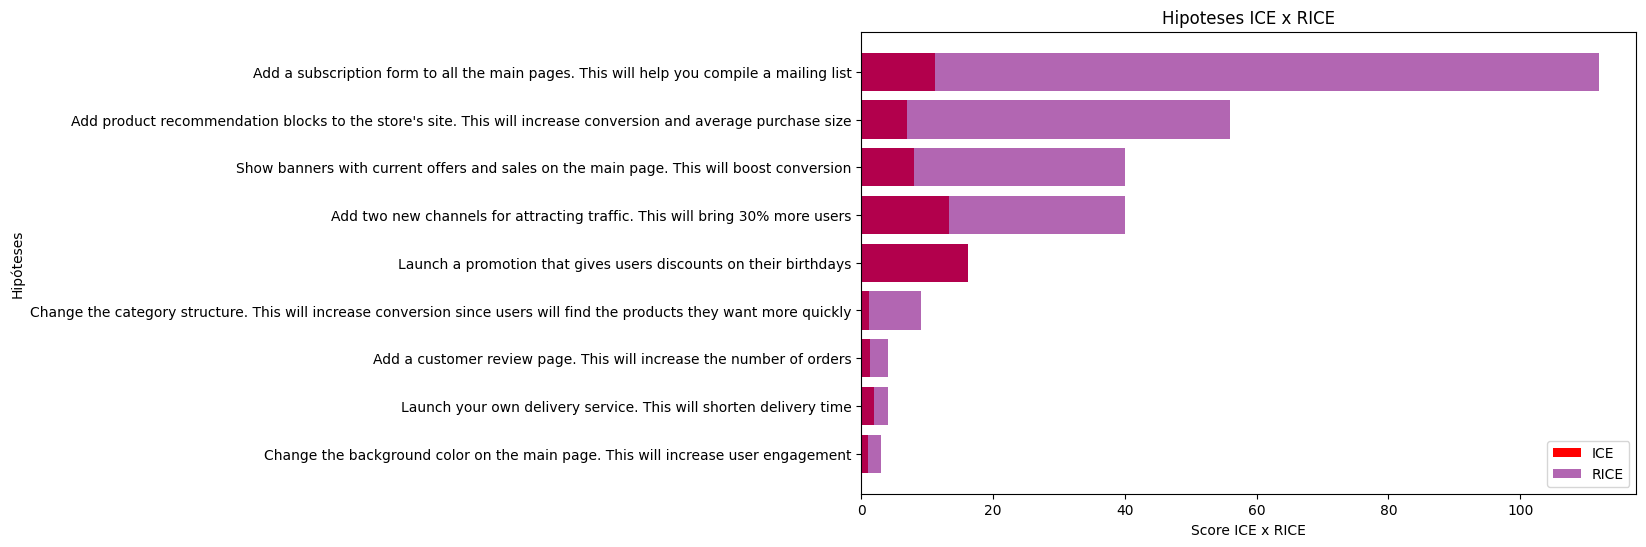

In [146]:
# Mostre como a priorização de hipóteses muda quando você usa RICE em vez de ICE. Dê uma explicação para as alterações.
hypotheses = hypotheses.sort_values(by='RICE', ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(hypotheses['Hypothesis'], hypotheses['ICE'], color='red', label='ICE')
plt.barh(hypotheses['Hypothesis'], hypotheses['RICE'], color='purple', alpha=0.6, label='RICE')

plt.xlabel('Score ICE x RICE')
plt.ylabel('Hipóteses')
plt.title('Hipoteses ICE x RICE')
plt.legend()
plt.show()

#### Resposta do aluno: 
#### Priorizando a hipotese RICE, temos uma mudança na ordem de prioridade, segundo o estudo, o primeiro passo seria adcionar um formulario de inscrição em todas as primeiras páginas, seguido pela recomendação de produtos em blocos, acredito que o 'alcance', tem maior impacto na combinação de fatores, determinando a escala apresentada no gráfico.

In [147]:
# Parte 2º
# Você realizou um teste A/B e obteve os resultados descritos nos arquivos orders_us.csv e visitors_us.csv

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   2266.6       719
1 2019-08-01     B      17      17    967.2       713
2 2019-08-02     A      42      36   3734.9      1338
3 2019-08-02     B      40      39   3535.3      1294
4 2019-08-03     A      66      60   5550.1      1845


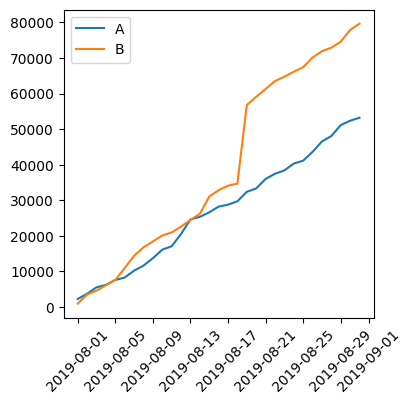

In [148]:
# Analise o teste A/B:

# Faça um gráfico da receita acumulada por grupo. Tire conclusões e crie conjecturas.
date_group = orders[['date', 'group']].drop_duplicates()

orders_aggregated = date_group.apply(
    lambda x: orders[
        np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])
    ].agg({
        'date': 'max',
        'group': 'max',
        'transactionId': pd.Series.nunique,
        'visitorId': pd.Series.nunique,
        'revenue': 'sum'
    }),
    axis=1
).sort_values(by=['date', 'group'])

visits_aggregated = date_group.apply(
    lambda x: visits[
        np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])
    ].agg({
        'date': 'max',
        'group': 'max',
        'visits': 'sum',
    }),
    axis=1
).sort_values(by=['date', 'group'])

cumulative_data = orders_aggregated.merge(visits_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulative_data.head(5))

cumulative_revenue_A = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]
cumulative_revenue_B = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]


plt.figure(figsize=(4, 4))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='B')

plt.legend()
plt.xticks(rotation=45)
plt.show()

#### Resposta do Aluno: 
#### Acima, grafico de receita acumulada por grupo, grupo B teve uma receita maior que o grupo A (no período de um mês). Ou seja o período pode ser curto, ou adequado para tomar alguma atitude, contudo será necessário desenvolver estudos mais aprofundados.  

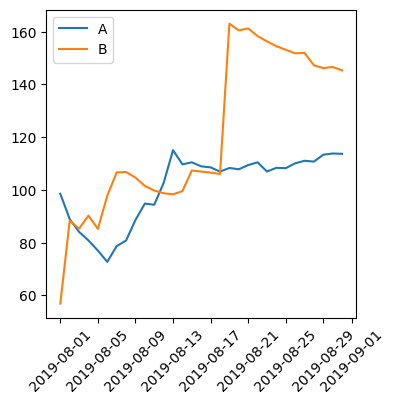

In [149]:
#Faça um gráfico do tamanho médio acumulado do pedido por grupo. Tire conclusões e crie conjecturas.

plt.figure(figsize=(4, 4))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue']/cumulative_revenue_A['orders'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue']/cumulative_revenue_B['orders'], label='B')
plt.xticks(rotation=45)
plt.legend()
plt.show()

#### Resposta do Aluno: Os valores médios dos pedidos do grupo B, foram maiores do que o grupo A no período de estudo, acredito que esse fator tem total relevância no estudo anterior, pois o grupo B também apresentou uma receita maior.

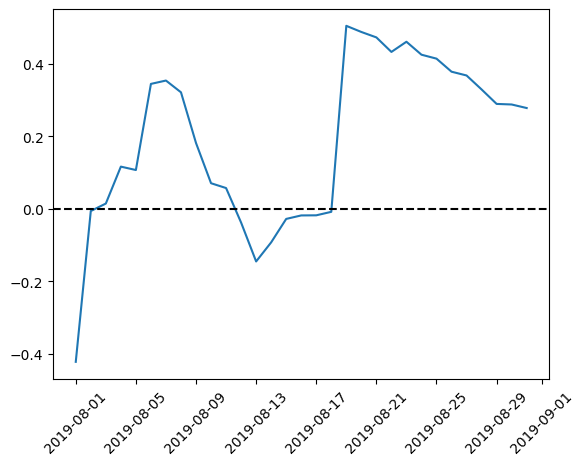

In [150]:
#Faça um gráfico da diferença relativa no tamanho médio acumulado do pedido para o grupo B em comparação com o grupo A. Faça conclusões e crie conjecturas.

merged_cumulative_revenue = cumulative_revenue_A.merge(cumulative_revenue_B, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.show()

#### Resposta do aluno: 
#### O gráfico apresenta o comparativo de performance dos dois grupos, no gráfico foi inserido uma marcação tracejada, que está próximo do 0.0, teoricamente isso signiica que os grupos tendem a ter uma performance similar, e o que pode estar ocasionanco uma discrepância, pode ser pedidos atípicos, com valores muito maiores que o convencional

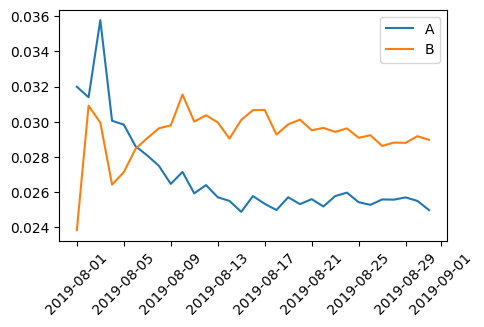

In [151]:
#Calcule a taxa de conversão de cada grupo como a proporção de pedidos para o número de visitas para cada dia. Trace as taxas de conversão diárias dos dois grupos e descreva a diferença. Tire conclusões e crie conjecturas.

cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']
#grupo A
cumulative_data_A = cumulative_data[cumulative_data['group']=='A']
#grupo B
cumulative_data_B = cumulative_data[cumulative_data['group']=='B']

plt.figure(figsize=(5, 3))
plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='B')
plt.xticks(rotation=45)
plt.legend()


#### Resposta do aluno: o grupo B apresentou um crescimento e uma estabilização na conversão conforme as visitas e o passar dos dias e o grupo A teve um pico muito grande no começo do mês, e teve uma queda e permaneceu em baixa até o final do período.

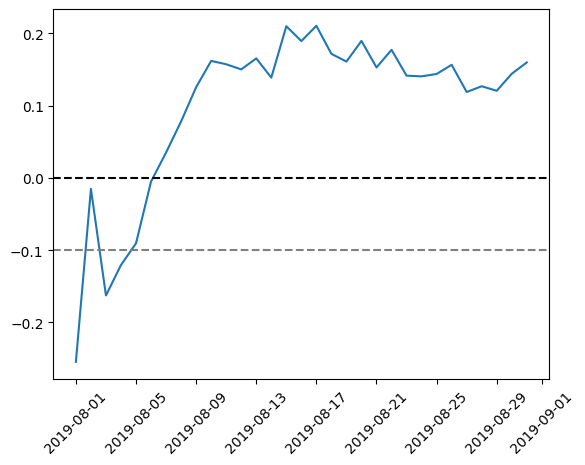

In [152]:
#Faça um gráfico da diferença relativa na conversão cumulativa para o grupo B em comparação com o grupo A. Tire conclusões e crie conjecturas.

merged_cumulative_conversions = cumulative_data_A[['date','conversion']].merge(cumulative_data_B[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(merged_cumulative_conversions['date'], merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1)
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')


#### Resposta do aluno: 
#### O grupo B teve um desempenho consistente superior em relação a média conversão acumulada do grupo A.

In [153]:
#Calcule os percentis 95 e 99 para o número de pedidos por usuário. 
# Defina o ponto em que um ponto de dados se torna uma anomalia.

#levantamento dos pedidos por usuarios:
orders_by_users = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

orders_by_users.columns = ['userId', 'orders']

print(orders_by_users.sort_values(by='orders', ascending=False).head(10))
print(np.percentile(orders_by_users['orders'], [95, 99]))

         userId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2
[1. 2.]


#### Resposta do aluno: 
#### 95% dos usuários fizeram até 1 pedido único, 99% dos usuários fizeram até 2 pedidos únicos, não posso considerar anomalia o cliente realizar até 3 pedidos no mês.

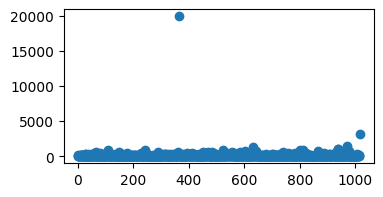

In [154]:
#Faça um gráfico de dispersão dos preços dos pedidos. Tire conclusões e crie conjecturas.

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(4, 2))
plt.scatter(x_values, orders['revenue'])

#### Resposta do aluno: Tem um pedido com um valor muito alto, totalmente atípico dos demais..

In [155]:
# Calcule os percentis 95 e 99 dos preços dos pedidos. Defina o ponto em que um ponto de dados se torna uma anomalia.

revenue_orders = (
    orders.drop(['date'], axis=1)
    .groupby('transactionId', as_index=False)
    .agg({'revenue': 'sum'})  
)

revenue_orders.columns = ['order', 'revenue']

print(revenue_orders.sort_values(by='revenue', ascending=False).head())
print(np.percentile(revenue_orders['revenue'], [95, 99]))


          order  revenue
143   590470918  19920.4
939  3936777065   3120.1
161   666610489   1425.8
875  3668308183   1335.6
850  3603576309   1050.0
[414.275 830.3  ]


#### Resposta do aluno: O pedido de número 59040918 no valor de 19mil, é totalmente atipíco, e esta provavelmente desbalanceando o estudo dos dados, não podemos considerar esse pedido, pois o valor o percentil de 99% é 830,30

In [166]:
# Encontre a significância estatística da diferença na conversão entre os grupos usando os dados brutos. 
# Tire conclusões e crie conjecturas.

orders_users_A = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
orders_users_A.columns = ['userId', 'orders']

orders_users_B = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
orders_users_B.columns = ['userId', 'orders']

pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(orders_users_A['orders'])), name='orders')
[orders_users_A['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(orders_users_A['orders'])), name='orders')]

sampleA = pd.concat([orders_users_A['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(orders_users_A['orders'])), name='orders')],axis=0)
sampleB = pd.concat([orders_users_B['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(orders_users_B['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.011
0.160


#### Resposta do aluno: não existe uma diferença significativa na conversão, contudo o grupo B é 16% maior que o grupo A (dados brutos)

In [167]:
# Encontre a significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados brutos. 
# Tire conclusões e crie conjecturas.

print('{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[orders['group'] == 'A']['revenue'],
            orders[orders['group'] == 'B']['revenue'],
        )[1]))
print('{0:.3f}'.format(
        orders[orders['group'] == 'B']['revenue'].mean()
        / orders[orders['group'] == 'A']['revenue'].mean()
        - 1))

0.862
0.278


#### Resposta do aluno: existe diferença na significancia estatistica do tamanho médio dos pedidos entre os grupos, e a diferença relativa é mais de 8% (dados brutos)

In [165]:
# Encontre a significância estatística da diferença na conversão entre os grupos usando os dados filtrados. 
# Tire conclusões e crie conjecturas.
limite_superior = 19000
revenue_orders_filter = orders[orders['revenue'] <= limite_superior]

orders_users_A = revenue_orders_filter[revenue_orders_filter['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
orders_users_A.columns = ['userId', 'orders']

orders_users_B = revenue_orders_filter[revenue_orders_filter['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
orders_users_B.columns = ['userId', 'orders']

pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(orders_users_A['orders'])), name='orders')
[orders_users_A['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(orders_users_A['orders'])), name='orders')]

sampleA = pd.concat([orders_users_A['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(orders_users_A['orders'])), name='orders')],axis=0)
sampleB = pd.concat([orders_users_B['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(orders_users_B['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.012
0.158


#### Já tivemos uma mudança no resultado em relação ao primeiro caso.

In [162]:
# Encontre a significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados filtrados. 
# Tire conclusões e crie conjecturas.

# para encontrar a significância estatista, preciso excluir os valores anômalos.
# pedido anômalo já identificado.
limite_superior = 19000
revenue_orders_filter = orders[orders['revenue'] <= limite_superior]

print('{0:.3f}'.format(
        stats.mannwhitneyu(
            revenue_orders_filter[revenue_orders_filter['group'] == 'A']['revenue'],
            revenue_orders_filter[revenue_orders_filter['group'] == 'B']['revenue'],
        )[1]))
print('{0:.3f}'.format(
        revenue_orders_filter[revenue_orders_filter['group'] == 'B']['revenue'].mean()
        / revenue_orders_filter[revenue_orders_filter['group'] == 'A']['revenue'].mean()
        - 1))

0.823
-0.040


#### Resposta do aluno: Os dados ja mudaram, com a eliminação dos dados anômalos, o tamanho médio dos pedido do grupo B mostra-se 4% menor que o A, e anteriormente ele era 8% maior!

### Tome uma decisão com base nos resultados do teste. As decisões possíveis são: 
#### 1. Pare o teste, considere um dos grupos o líder. 
#### 2. Pare o teste, conclua que não há diferença entre os grupos. 3. Continue o teste.

<div class="alert alert-block alert-success">
<b> Resposta do aluno: </b> <a class="tocSkip"></a>

O meu voto é de interromper o teste, visto que que o grupo B mostrou-se inferior a versão original, não apresentou uma diferença significativa na conversão de pedidos, e o tamanho médio dos pedidos é 4% inferior em comparação ao A, é melhor manter a A. Acredito que rodar o teste por mais tempo para coletar mais dados o custo seria maior, e possívelmente inviável para a organização.
</div>